In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0,1'
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['LD_LIBRARY_PATH'] = '/usr/local/cuda-11.8/lib64'

import cv2
from homo_utils import generate_homo
import numpy as np
import torch

import matplotlib.pyplot as plt

import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.cuda.is_available())


1.10.1
11.3
True


In [ ]:
# os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
# os.environ['PATH'] = '/usr/local/cuda-11.8/bin' + os.environ['PATH']
# os.environ['CUDNN_INCLUDE_DIR'] = '/usr/local/cuda-11.8/include'
# os.environ['CUDNN_LIB_DIR'] = '/usr/local/cuda-11.8/lib64'
# os.environ['CUDNN_LIBRARY'] = '/usr/local/cuda-11.8/lib64/libcudnn.so.7.6.5'
# os.environ['CUDA_VISIBLE_DEVICES'] = '0,1'
# os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
# os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'

In [ ]:
# export PATH=/usr/local/cuda-11.8/bin:$PATH
# export LD_LIBRARY_PATH=/usr/local/cuda-11.8/lib64:$LD_LIBRARY_PATH
# export CUDA_HOME=/usr/local/cuda-11.8


In [2]:
import cupy; print(cupy.cuda.runtime.runtimeGetVersion())

11080


In [4]:
homo_parameter = {"marginal":32, "perturb":32, "patch_size":128}
image_list_img1 = '/home/mayank.mds2023/CV/MCNet/Photos-002/20250402_135410.jpg'
image_list_img2 = '/home/mayank.mds2023/CV/MCNet/Photos-002/20250402_135412.jpg'


img1 = cv2.imread(image_list_img1)
img2 = cv2.imread(image_list_img2)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img1 = cv2.resize(img1, (320, 240))
img2 = cv2.resize(img2, (320, 240))
    
homo_parameter["height"], homo_parameter["width"], _ = img1.shape

patch_img1_warp, patch_img2, four_gt, org_pts, dst_pts, large_img1_warp, large_img2 = generate_homo(img1, img2, homo_parameter=homo_parameter, transform=None)
print(patch_img1_warp.shape, patch_img2.shape)

torch.Size([3, 128, 128]) torch.Size([3, 128, 128])


In [35]:
four_gt

array([[-30.,  10.],
       [-29., -30.],
       [-14., -26.],
       [-31.,  31.]], dtype=float32)

In [36]:
dst_pts

array([[  2.,  42.],
       [130.,   2.],
       [ 18., 133.],
       [128., 190.]], dtype=float32)

In [37]:
large_img1_warp.shape, large_img2.shape

(torch.Size([3, 192, 192]), torch.Size([3, 192, 192]))

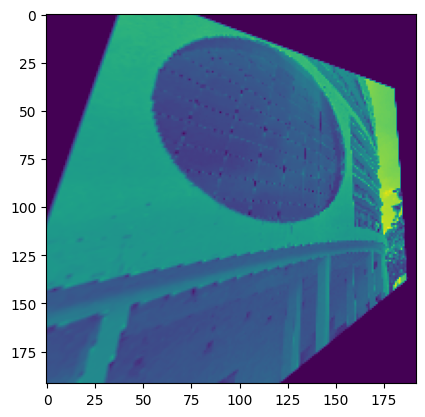

In [39]:
plt.imshow(large_img1_warp[0])

### Trying with two different images

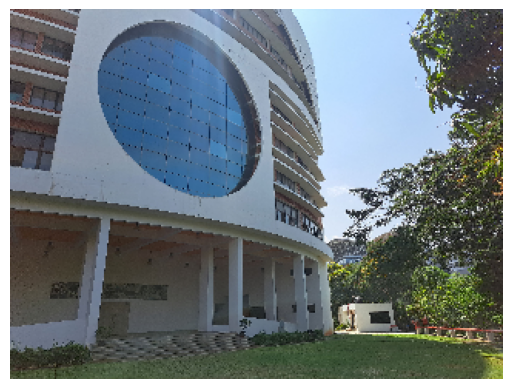

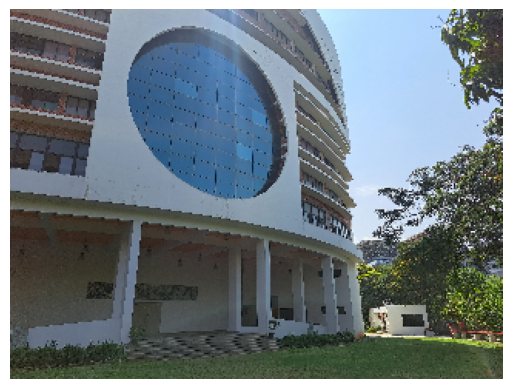

In [39]:
img1_path = 'Photos-002/20250402_135410.jpg'
img2_path = 'Photos-002/20250402_135412.jpg'
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)
assert img1 is not None and img2 is not None

img1 = cv2.resize(img1, (320, 240))
img2 = cv2.resize(img2, (320, 240))

# plt.figure(figsize=(10,10))
# plt.subplot(121)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
# plt.subplot(122)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [40]:
img1.shape

(240, 320, 3)

In [60]:
img1.shape[0]//2-64,img1.shape[0]//2+64,img1.shape[1]//2-64,img1.shape[1]//2+64

(56, 184, 96, 224)

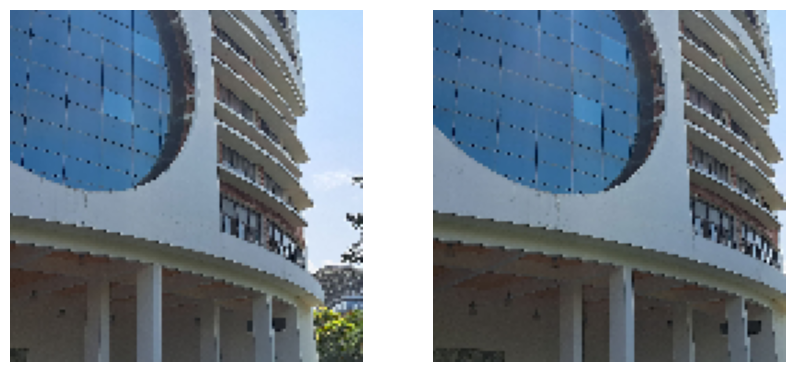

In [64]:
# top_left = (100, 50)
# bottom_right = (228, 178)

# top_left = (100, 50)
# bottom_right = (228, 178)

top_left = (img1.shape[1]//2-64, img1.shape[0]//2-64)
bottom_right = (img1.shape[1]//2+64, img1.shape[0]//2+64)

cropped_img1 = img1[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0], :]
cropped_img2 = img2[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0], :]

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(cropped_img1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(122)
plt.imshow(cv2.cvtColor(cropped_img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [44]:
new_img1_path = os.path.join('Photos-002', 'cropped_' + img1_path[11:])
new_img2_path = os.path.join('Photos-002', 'cropped_' + img2_path[11:])

new_img1_path

'Photos-002/cropped_20250402_135410.jpg'

In [45]:
cv2.imwrite(new_img1_path, cropped_img1)
cv2.imwrite(new_img2_path, cropped_img2)

True

In [46]:
cropped_img1.shape, torch.tensor(cropped_img1).permute(2, 0, 1).shape

((128, 128, 3), torch.Size([3, 128, 128]))

In [65]:
four_point_org = np.array(
    [[top_left[0], top_left[1]], 
     [bottom_right[0], top_left[1]], 
     [bottom_right[0], bottom_right[1]], 
     [top_left[0], bottom_right[1]]], dtype=np.float32
)
four_point_org

array([[ 96.,  56.],
       [224.,  56.],
       [224., 184.],
       [ 96., 184.]], dtype=float32)

In [48]:
prediction = np.array([[15.8949,  3.8547],
         [18.1237, -2.1433],
         [19.1163,  0.5585],
         [20.4112,  1.3640]], dtype=np.float32)

four_point_new = prediction + four_point_org
four_point_new

array([[115.8949,  53.8547],
       [246.1237,  47.8567],
       [247.1163, 178.5585],
       [120.4112, 179.364 ]], dtype=float32)

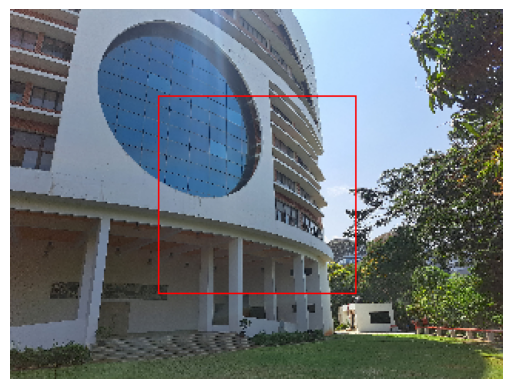

In [66]:
# Draw the points on the image
img1_four_points = img1.copy()
cv2.polylines(img1_four_points, np.int32([four_point_org]), 1, (0,0,255))

plt.imshow(cv2.cvtColor(img1_four_points, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

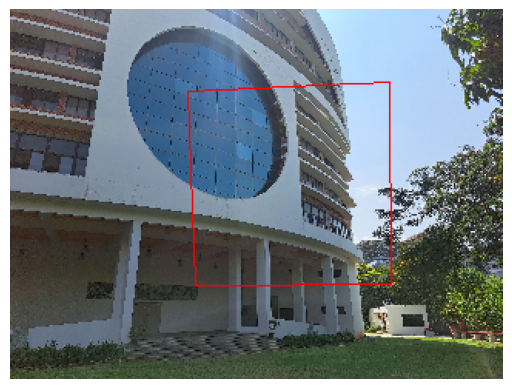

In [51]:
# Draw the points on the image
img2_four_points = img2.copy()
cv2.polylines(img2_four_points, np.int32([four_point_new]), 1, (0,0,255))

plt.imshow(cv2.cvtColor(img2_four_points, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [52]:
# Compute the perspective transform matrix
H = cv2.getPerspectiveTransform(four_point_org, four_point_new)
H

array([[ 9.22972076e-01,  6.05309703e-02,  1.83078767e+01],
       [-6.04441284e-02,  1.00002753e+00,  8.84602771e+00],
       [-3.02985176e-04,  2.15398440e-04,  1.00000000e+00]])

In [53]:
# Get the width and height of the image
height, width = img2.shape[:2]

# Apply the perspective warp
img_pred = cv2.warpPerspective(img2, H, (width, height), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

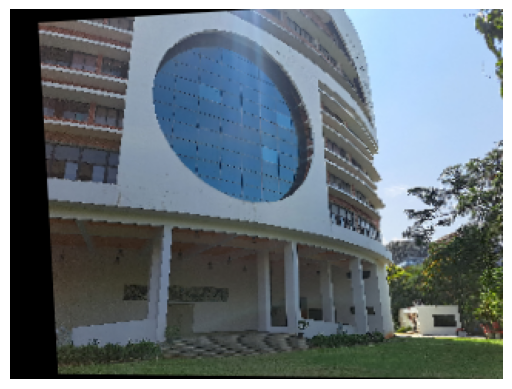

In [54]:
plt.imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [59]:
# Save the images
cv2.imwrite('output/img1.jpg', img1)
cv2.imwrite('output/img2.jpg', img2)
cv2.imwrite('output/img1_four_points.jpg', img1_four_points)
cv2.imwrite('output/img2_four_points.jpg', img2_four_points)
cv2.imwrite('output/img_pred.jpg', img_pred)

True

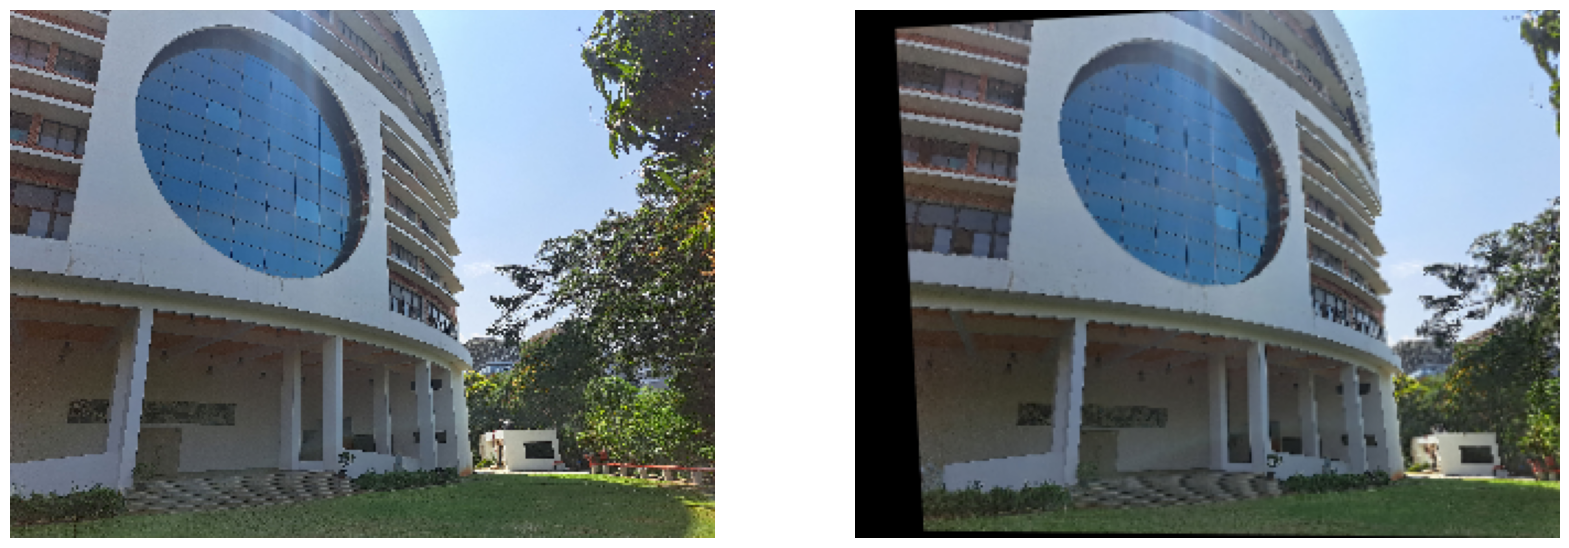

In [58]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(122)
plt.imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()